In [ ]:
import nltk
from nltk import word_tokenize, pos_tag , sent_tokenize
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
import sklearn
import seaborn as sns
pio.renderers.default = "svg"
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
!pip install pywaffle matplotlib
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer 
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# **Présentation du Dataset et analyse des variables**

In [ ]:
data = pd.read_csv("/content/sample_data/Corona_NLP_test (1).csv",encoding='latin1')
df=data
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
#colonnes 
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
#info sur les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [ ]:
#Variable sentiment
df.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

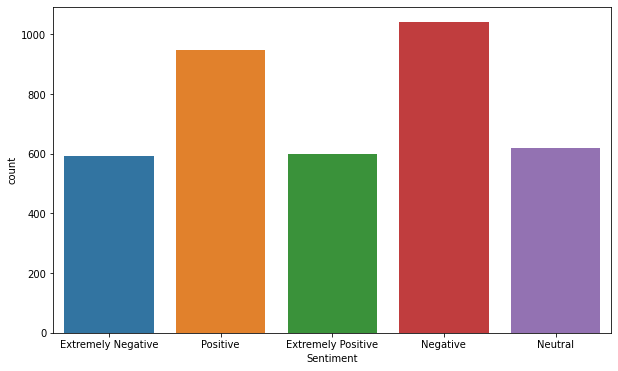

In [ ]:
#SENTIMENT BARPLOT
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data = df);

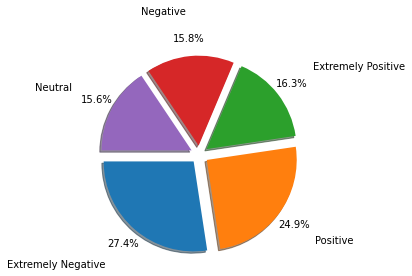

In [ ]:
#sentiment 
plt.pie(data['Sentiment'].value_counts(),labels=(data['Sentiment'].unique()), explode = [0.1,0.1,0.1,0.1,.1],autopct ='%1.1f%%',shadow = True, startangle = 180, labeldistance = 1.5, pctdistance =1.2)

plt.axis('equal')
plt.show()

In [ ]:
#VARIABLE LOCATION
df.Location.value_counts()

United States             75
London, England           48
Washington, DC            38
New York, NY              34
Los Angeles, CA           33
                          ..
DLT & ILP, Not Really      1
City of London, London     1
Lake Worth Beach, FL       1
Luxembourg                 1
Charsadda, Pakistan        1
Name: Location, Length: 1717, dtype: int64

# **Classification Naive BAYES**

- Classificateur MultinomialNB avec countvectorizer avec Ngram 1 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv= CountVectorizer(stop_words='english' ,ngram_range=(1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['OriginalTweet'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.25, random_state=5)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
from sklearn import metrics
predicted= MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

38.42%


* Classificateur MultinomialNB avec countvectorizer avec Ngram 2



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv= CountVectorizer(stop_words='english' ,ngram_range=(2,2),tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['OriginalTweet'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.25, random_state=5)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
from sklearn import metrics

accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print('MultinomialNB = ' +str('{:04.2F}'.format(accuracy_score*100))+'%')

MultinomialNB = 31.05%


* Classificateur ComplementNB avec countvectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv=CountVectorizer(stop_words='english' ,ngram_range=(1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['OriginalTweet'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.25, random_state=5)

from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(X_train, Y_train)


from sklearn import metrics

predicted= CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

35.05%


* Classificateur BernouilliNB avec countvectorizer



In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)


from sklearn import metrics

predicted= BNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

32.95%


* Différent algorithme naive bayes avec TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_counts_2 = tfidf.fit_transform(data["OriginalTweet"])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_counts_2, data['Sentiment'], test_size=0.25, random_state=42)
#
MNB.fit(x_train, y_train)
MNBaccuracy_score = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('Multinominal NB = ' +str('{:04.2F}'.format(MNBaccuracy_score*100))+'%')
#
CNB.fit(x_train, y_train)
CNBaccuracy_score = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('Complement  NB = ' +str('{:04.2F}'.format(CNBaccuracy_score*100))+'%')
BNB.fit(x_train, y_train)
BNBaccuracy_score = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('Bernoulli NB = ' +str('{:04.2F}'.format(BNBaccuracy_score*100))+'%')

Multinominal NB = 30.74%
Complement  NB = 36.95%
Bernoulli NB = 31.37%


# **Matrice de confusion**

Text(0.5, 1.0, 'Confusion Matrix')

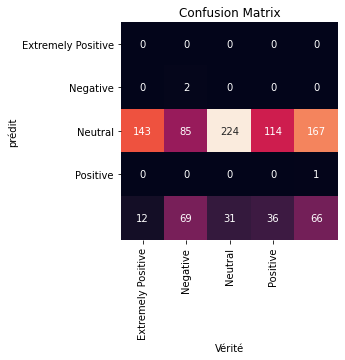

In [ ]:

from sklearn.metrics import confusion_matrix

MNB.fit(x_train, y_train)
pred = MNB.predict(x_test)
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Vérité')
plt.ylabel('prédit')
plt.title("Confusion Matrix")

# **Classificateur SVM**

In [ ]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
#ON TF_idf data
print('On Tf_idf') 
LSVC.fit(x_train, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(x_test), y_test)
print('accuuracy_score_lsvc= ' + str('{:04.2F}'.format(accuracy_score_lsvc*100))+'%')
print('on countvectorizer data') 
LSVC.fit(X_train, Y_train)
accuracy_score_lsvc2 = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print('accuuracy_score_lsvc= ' + str('{:04.2F}'.format(accuracy_score_lsvc2*100))+'%')

On Tf_idf
accuuracy_score_lsvc= 40.95%
on countvectorizer data
accuuracy_score_lsvc= 42.00%


# **Comparaison des classificateurs**

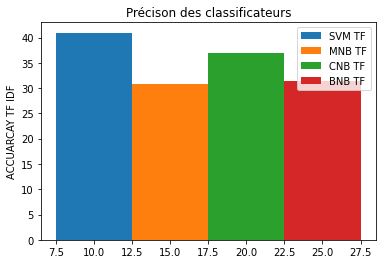

In [ ]:
plt.bar(10,accuracy_score_lsvc*100,5, label="SVM TF")
plt.bar(15,MNBaccuracy_score*100,5, label="MNB TF")
plt.bar(20,CNBaccuracy_score*100,5, label="CNB TF")
plt.bar(25,BNBaccuracy_score*100,5, label="BNB TF")
plt.legend()
plt.ylabel('ACCUARCAY TF IDF')
plt.title('Précison des classificateurs')
plt.show()

# **SVM Méthode 2 :**

In [ ]:
trainData= pd.read_csv("/content/sample_data/Corona_NLP_test (1).csv",encoding='latin1')
testData= pd.read_csv("/content/sample_data/Corona_NLP_test (1).csv",encoding='latin1')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(trainData['OriginalTweet'])
test_vectors = vectorizer.transform(testData['OriginalTweet'])

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# classification avec SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['Sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# resultas
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['Sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['Positive'])
print('negative: ', report['Negative'])

Training time: 5.516258s; Prediction time: 3.870328s
positive:  {'precision': 0.7402843601895734, 'recall': 0.8247096092925026, 'f1-score': 0.7802197802197801, 'support': 947}
negative:  {'precision': 0.7316680096696213, 'recall': 0.8722382324687801, 'f1-score': 0.7957931638913234, 'support': 1041}


# **Tester SVM**

In [ ]:
tweet1 = "BE CALM A LOT OF GOOD THINGS ARE GOING TO HAPPEN"
tweet1_vector = vectorizer.transform([tweet1]) # vectorizing
print(classifier_linear.predict(tweet1_vector))

['Positive']


In [ ]:
tweet2 = " I hate lockdown "
tweet2_vector = vectorizer.transform([tweet2]) # vectorizing
print(classifier_linear.predict(tweet2_vector))

['Negative']
